<a href="https://colab.research.google.com/github/AKSHYATA15/SIH-PROJECT/blob/main/BrandLogo_detect_and_verify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Training

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
p = Path().cwd()
q = p/"/kaggle/input/dataset/Fake-brand-logo-detection-main/Brands"
target_dict = {"Fake": 1, "Original": 0}
images = []
labels = []

for fldr in q.iterdir():
    current_label = fldr.name

    for subfldr1 in fldr.iterdir():
        current_sublabel1 = subfldr1.name

        for subfldr2 in subfldr1.iterdir():
            current_sublabel2 = subfldr2.name

            for img in subfldr2.iterdir():
                if img.is_file():
                    img = load_img(img, color_mode="grayscale")
                    img_array = img_to_array(img)
                    img_array_resized = smart_resize(img_array, (256, 256))
                    images.append(img_array_resized)
                    labels.append(target_dict[current_sublabel2])

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


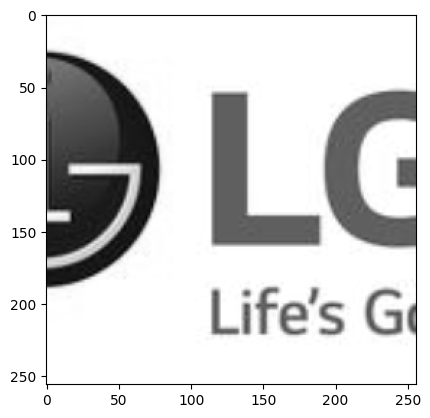

In [ ]:
plt.imshow(images[190], cmap='gray')

In [ ]:
def train_test_validation_data(images, labels, test_size=0.2, random_state=42):

    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=random_state)
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=test_size, random_state=random_state)


    train_images = np.array(train_images)
    test_images = np.array(test_images)
    val_images = np.array(val_images)

    train_images = train_images / 255
    test_images = test_images / 255
    val_images = val_images / 255

    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)
    val_labels = np.array(val_labels)


    return train_images, val_images, test_images, train_labels, val_labels, test_labels
train_images, val_images, test_images, train_labels, val_labels, test_labels = train_test_validation_data(images, labels)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
initializer = tf.keras.initializers.HeUniform()

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/da/05/8912c901a3965ec7117d6cc33eaec3888c717611f72ce69d8be62a01d149/aggdraw-1.3.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 30.3 MB/s eta 0:00:00


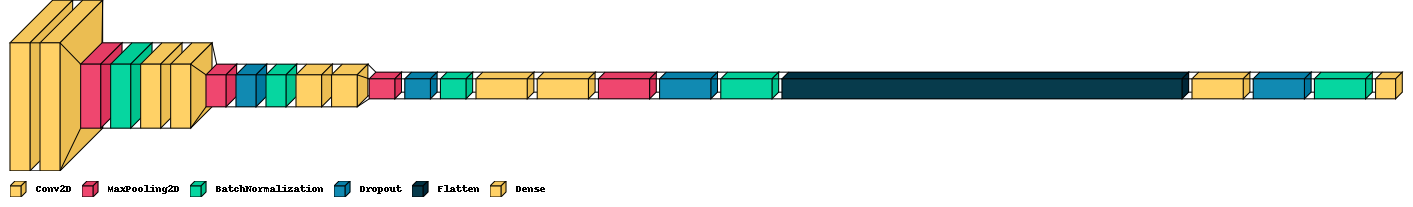

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, scale_xy=0.5,legend=True)

In [ ]:
model.summary()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

validation_loss, validation_acc = model.evaluate(val_images, val_labels)

print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     1

2023-12-12 23:39:30.723895: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


311/311 [==============================] - 94s 255ms/step - loss: 0.5754 - accuracy: 0.7838 - val_loss: 0.4951 - val_accuracy: 0.7922
Epoch 2/10
311/311 [==============================] - 76s 244ms/step - loss: 0.4023 - accuracy: 0.8526 - val_loss: 1.0835 - val_accuracy: 0.6503
Epoch 3/10
311/311 [==============================] - 76s 244ms/step - loss: 0.3929 - accuracy: 0.8557 - val_loss: 0.4412 - val_accuracy: 0.8669
Epoch 4/10
311/311 [==============================] - 76s 243ms/step - loss: 0.3700 - accuracy: 0.8679 - val_loss: 0.4019 - val_accuracy: 0.8798
Epoch 5/10
311/311 [==============================] - 76s 243ms/step - loss: 0.3506 - accuracy: 0.8713 - val_loss: 0.3576 - val_accuracy: 0.8788
Epoch 6/10
311/311 [==============================] - 76s 243ms/step - loss: 0.3461 - accuracy: 0.8744 - val_loss: 0.3690 - val_accuracy: 0.8706
Epoch 7/10
311/311 [==============================] - 75s 243ms/step - loss: 0.3209 - accuracy: 0.8817 - val_loss: 0.3612 - val_accuracy: 0.8

In [ ]:
model.save('fake_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


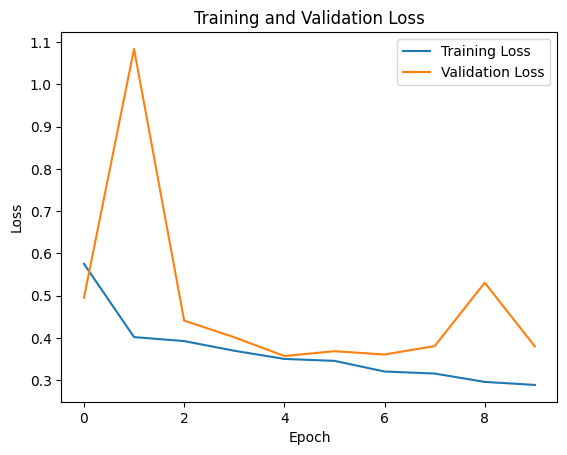

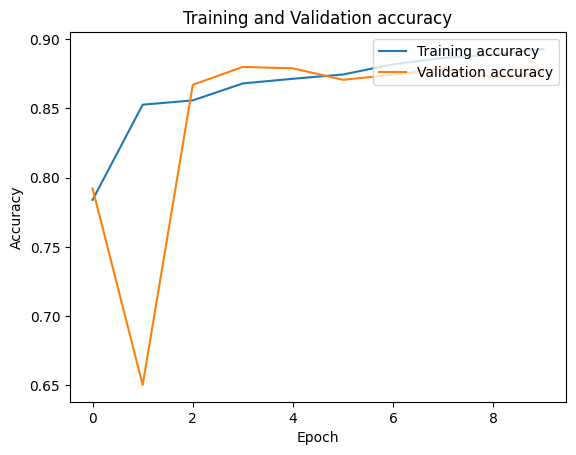

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

test_pred_labels = np.argmax(model.predict(test_images), axis=1)

print(classification_report(test_labels, test_pred_labels))

76/76 [==============================] - 4s 57ms/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1997
           1       0.63      0.37      0.46       426

    accuracy                           0.85      2423
   macro avg       0.75      0.66      0.69      2423
weighted avg       0.83      0.85      0.83      2423



Confusion matrix:
[[1905   92]
 [ 270  156]]


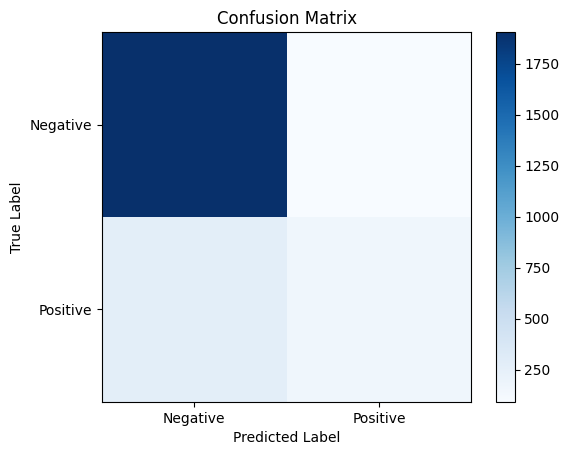

In [ ]:
cm = confusion_matrix(test_labels, test_pred_labels)

print('Confusion matrix:')
print(cm)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

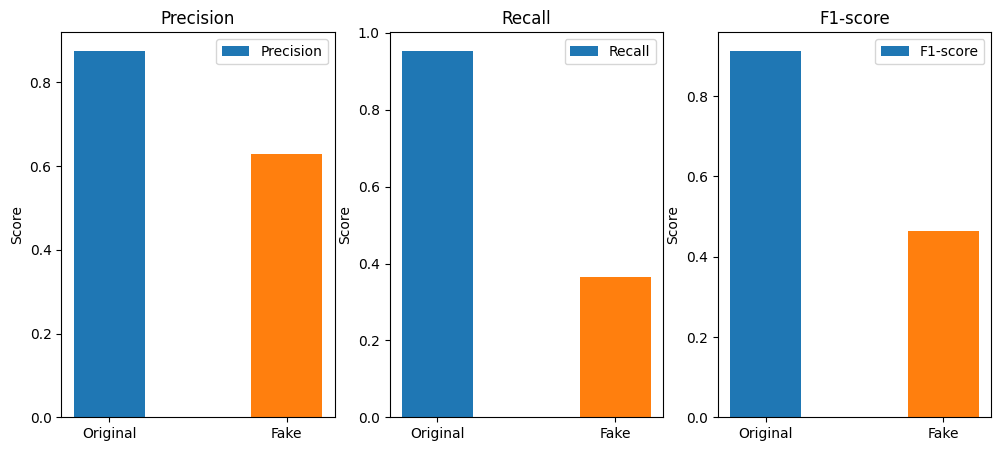

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/fake_model.h5')

In [ ]:
from PIL import Image

image_file = "/kaggle/input/dataset/Fake-brand-logo-detection-main/Brands/Electronics/JBL/Fake/JBL fake (12).jpg" # Change the test image path here

image = Image.open(image_file)

image = image.convert("L")

image = image.resize((256, 256))
image_array = np.array(image)
image_array = np.expand_dims(image_array, axis=0)

image_array = image_array / 255

1/1 [==============================] - 0s 20ms/step


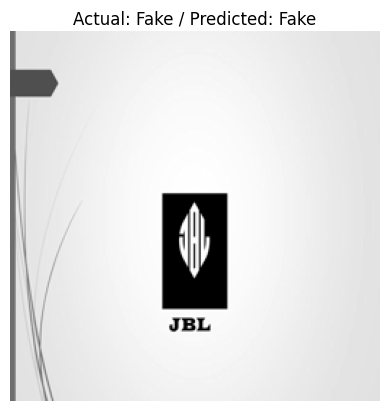

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(image_array)
predicted_label = np.argmax(predictions)

classes = ["Original", "Fake"]

actual_label = "Original" if "Original" in image_file else "Fake"

plt.imshow(image, cmap="gray")
plt.title(f"Actual: {actual_label} / Predicted: {classes[predicted_label]}")
plt.axis("off")
plt.show()